# Încărcarea și descrierea bazei de date

În această secțiune vom încărca baza de date și vom analiza structura și conținutul acesteia.

In [68]:
import pandas as pd  # Pandas pentru manipularea datelor

df = pd.read_csv("Combined Data.csv")

In [69]:
#afiseaza primele 5 randuri
print(df.head())

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [70]:
# vercăm informați despre date
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


Verificăm dacă avem valori lipsă

In [71]:
print(df.isnull().sum())

Unnamed: 0      0
statement     362
status          0
dtype: int64


## Curățarea datelor  
- eliminam colana cu index, poate fii redurdantă  
- eliminăm valorile lipsă din statement

In [72]:
# Eliminăm coloana Unnamed: 0
df = df.drop(columns=["Unnamed: 0"])

# Eliminăm rândurile unde statement este NaN
df = df.dropna(subset=["statement"])

# Verificăm din nou datele după curățare
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
statement    0
status       0
dtype: int64


Descrierea datelor  
 - analizam distribuția eticheteleor și lungimea textelor

In [73]:
print(df["status"].value_counts())  # Numărul de apariții pentru fiecare etichetă

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


In [74]:
df["text_length"] = df["statement"].apply(len)  # Adăugăm o coloană cu lungimea textelor
print(df["text_length"].describe())  # Afișează statistici (min, max, medie, etc.)

count    52681.000000
mean       578.713749
std        846.268855
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: text_length, dtype: float64


In [75]:
df.head(10)  # Afișează primele 10 rânduri pentru a verifica modificările

,statement,status,text_length
0,oh my gosh,Anxiety,10
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78
3,I've shifted my focus to something else but I'...,Anxiety,61
4,"I'm restless and restless, it's been a month n...",Anxiety,72
5,"every break, you must be nervous, like somethi...",Anxiety,76
6,"I feel scared, anxious, what can I do? And may...",Anxiety,78
7,Have you ever felt nervous but didn't know why?,Anxiety,47
8,"I haven't slept well for 2 days, it's like I'm...",Anxiety,70
9,"I'm really worried, I want to cry.",Anxiety,34


Corelația se aplică pe date numerice așa că transformăm textul în informație numerică

In [76]:
df["word_count"] = df["statement"].apply(lambda x: len(str(x).split()))

In [77]:
df.head(10)  # Afișează primele 10 rânduri pentru a verifica modificările

,statement,status,text_length,word_count
0,oh my gosh,Anxiety,10,3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,10
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,14
3,I've shifted my focus to something else but I'...,Anxiety,61,11
4,"I'm restless and restless, it's been a month n...",Anxiety,72,14
5,"every break, you must be nervous, like somethi...",Anxiety,76,14
6,"I feel scared, anxious, what can I do? And may...",Anxiety,78,17
7,Have you ever felt nervous but didn't know why?,Anxiety,47,9
8,"I haven't slept well for 2 days, it's like I'm...",Anxiety,70,14
9,"I'm really worried, I want to cry.",Anxiety,34,7


Convertim etichetele (status) în numere

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["status_encoded"] = encoder.fit_transform(df["status"])

In [79]:
df.head(800)  

,statement,status,text_length,word_count,status_encoded
0,oh my gosh,Anxiety,10,3,0
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,10,0
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,14,0
3,I've shifted my focus to something else but I'...,Anxiety,61,11,0
4,"I'm restless and restless, it's been a month n...",Anxiety,72,14,0
...,...,...,...,...,...
798,wow shey. I just realized and just found out t...,Normal,75,17,3
799,Galaxy opal giannis makes me cum,Normal,32,6,3
800,the harmonization HSUHSI â ¤ï¸,Normal,30,5,3
801,This morning feels like the wind is really Eid,Normal,46,9,3


### Calculăm matricea de corelație

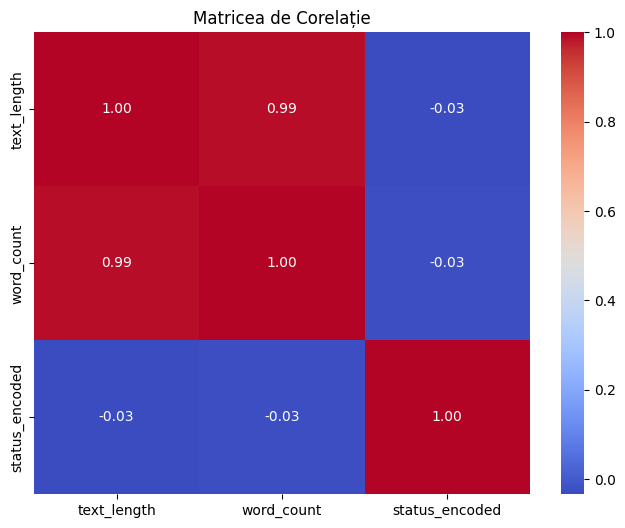

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selectăm doar coloanele numerice
numeric_df = df[["text_length", "word_count", "status_encoded"]]

# Calculăm matricea de corelație
correlation_matrix = numeric_df.corr()

# Vizualizare
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matricea de Corelație")
plt.show()
# Verificăm corelația dintre lungimea textului și status

In [81]:
#stergem coloana text_length pentru ca sunt aproape indenice si sa nu fie redurdanta
df = df.drop(columns=["text_length"])

### Calculăm entropia 

In [82]:
import numpy as np

# Calculăm frecvența fiecărei clase
status_counts = df['status'].value_counts(normalize=True)  # Probabilități

# Aplicăm formula entropiei
entropy = -np.sum(status_counts * np.log2(status_counts))

print(f"Entropia datasetului: {entropy:.4f}")


Entropia datasetului: 2.3364


Vom pregăti textul de împărțire pe cuvinte așadar avem nevoie să îl curățăm

### Curățam datele mai profund

**Pași principali:**

- Transformare în litere mici  
- Eliminare punctuație, emoji-uri, caractere speciale  
- Eliminare stopwords (ex: *the*, *is*, *at*, *on*...)

In [83]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Descărcăm stopwords dacă nu sunt deja descărcate
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Verificăm dacă textul nu e NaN
        text = text.lower()  # Transformăm în litere mici
        text = re.sub(r'\d+', '', text)  # Eliminăm cifrele
        text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminăm punctuația
        text = ' '.join(word for word in text.split() if word not in stop_words)  # Eliminăm stopwords
        return text
    return ""

# Aplicăm curățarea pe întreaga coloană 'statement'
df['clean_statement'] = df['statement'].apply(clean_text)

# Verificăm rezultatul
print(df[['statement', 'clean_statement']].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   
5  every break, you must be nervous, like somethi...   
6  I feel scared, anxious, what can I do? And may...   
7    Have you ever felt nervous but didn't know why?   
8  I haven't slept well for 2 days, it's like I'm...   
9                 I'm really worried, I want to cry.   

                                     clean_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  
5  every break must nervous like something wrong ... 

**Acum facem tokenizare(înpărțirea textului în cuvinte) și word cont**

Am adaugat încă o coloana în care am cuvintele in liste din fiecare descriere

In [84]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize



# Funcție pentru tokenizare
df['tokens'] = df['clean_statement'].apply(word_tokenize)

# Adăugăm o coloană cu numărul de cuvinte
df['word_count'] = df['tokens'].apply(len)

# Verificăm rezultatul
print(df[['clean_statement', 'tokens', 'word_count']].head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                     clean_statement  \
0                                            oh gosh   
1  trouble sleeping confused mind restless heart ...   
2  wrong back dear forward doubt stay restless re...   
3  ive shifted focus something else im still worried   
4                im restless restless month boy mean   
5  every break must nervous like something wrong ...   
6        feel scared anxious may family us protected   
7                       ever felt nervous didnt know   
8        havent slept well days like im restless huh   
9                         im really worried want cry   

                                              tokens  word_count  
0                                         [oh, gosh]           2  
1  [trouble, sleeping, confused, mind, restless, ...           7  
2  [wrong, back, dear, forward, doubt, stay, rest...           9  
3  [ive, shifted, focus, something, else, im, sti...           8  
4         [im, restless, restless, month, boy, m

**Facem un shuffle la date pentru a amesteca rândurile**

In [85]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)  # Random_state asigură reproducibilitate
df.reset_index(drop=True, inplace=True)  # Resetăm indexul după shuffle
print(df.head(10))  # Verificăm primele 10 rânduri după amestecare

                                           statement      status  word_count  \
0               I'm lazy to complain about it ba ihh      Normal           5   
1  i think the wifi on my iphone is broken it wil...      Normal          11   
2  Good tracking apps? I've been trying to find a...     Bipolar          40   
3  I have recently looked into reddit and found t...  Depression         293   
4                  that's your favorite thing to do?      Normal           3   
5  I have enough goodies to play santa claus but ...    Suicidal          24   
6  want to sleep but soon the call to prayer for ...      Normal           8   
7  you use them to wipe the handle of the shoppin...      Normal           5   
8  Is it good to only focus on 1 goal? What I mea...      Stress         219   
9  Hi guys, I am looking for podcasts to listen t...  Depression          58   

   status_encoded                                    clean_statement  \
0               3                            im

**Calculăm Gini Index care este utilizat pentru a măsura impuritatea unui set de date.**

In [86]:
import numpy as np

# Calculăm proporția fiecărei clase
status_counts = df['status'].value_counts(normalize=True)

# Aplicăm formula Gini Index
gini_index = 1 - np.sum(status_counts ** 2)

print(f"Gini Index: {gini_index:.4f}")


Gini Index: 0.7665


Information Quantity (IQ) este similară cu entropia

In [87]:
# Calculăm Information Quantity (aceeași formulă ca entropia)
information_quantity = -np.sum(status_counts * np.log2(status_counts))

print(f"Information Quantity: {information_quantity:.4f}")


Information Quantity: 2.3364


Facem un grafic pentru a observa comparațile dintre Entropie, Gini Index și Information Quantity.

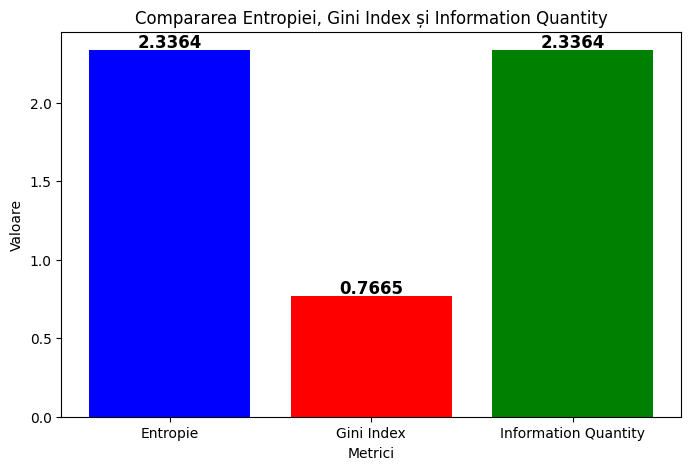

In [88]:
import matplotlib.pyplot as plt

# Valori pentru vizualizare
metrics = ['Entropie', 'Gini Index', 'Information Quantity']
values = [entropy, gini_index, information_quantity]

# Creăm un bar chart
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=['blue', 'red', 'green'])

# Adăugăm etichete și titlu
plt.xlabel("Metrici")
plt.ylabel("Valoare")
plt.title("Compararea Entropiei, Gini Index și Information Quantity")

# Afișăm valorile pe bare
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')

# Afișăm graficul
plt.show()


In [89]:
df.head(5)
#salvam datele curatate
df.to_csv("Cleaned_Data.csv", index=False)

## Înpărțim datele 80% antrenare, 20% testare

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['clean_statement'], df['status'], test_size=0.2, random_state=42)
print(f"Dimensiunea setului de antrenament: {len(X_train)}")
print(f"Dimensiunea setului de testare: {len(X_test)}")

Dimensiunea setului de antrenament: 42144
Dimensiunea setului de testare: 10537


Cod pentru transformarea textului cu TF-IDF

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inițializăm TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limităm la 5000 de caracteristici pentru performanță

# Aplicăm pe datele de antrenament și test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Forma matricei TF-IDF pentru train:", X_train_tfidf.shape)
print("Forma matricei TF-IDF pentru test:", X_test_tfidf.shape)


Forma matricei TF-IDF pentru train: (42144, 5000)
Forma matricei TF-IDF pentru test: (10537, 5000)


#### Încercăm datele noastre pe 3 algoritmi să vedem care este mai bun 
**Vom implementa antrenarea și evaluarea celor 3 modele folosind:**  
- Naive Bayes  
- Logistic Regression  
- Random Forest


🔹 Naive Bayes Model Evaluation 🔹
Accuracy: 0.6839
Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.77      0.65      0.70       765
             Bipolar       0.89      0.52      0.65       595
          Depression       0.54      0.80      0.65      3083
              Normal       0.83      0.82      0.82      3278
Personality disorder       0.96      0.11      0.20       207
              Stress       0.86      0.14      0.24       527
            Suicidal       0.71      0.56      0.62      2082

            accuracy                           0.68     10537
           macro avg       0.79      0.51      0.55     10537
        weighted avg       0.72      0.68      0.67     10537



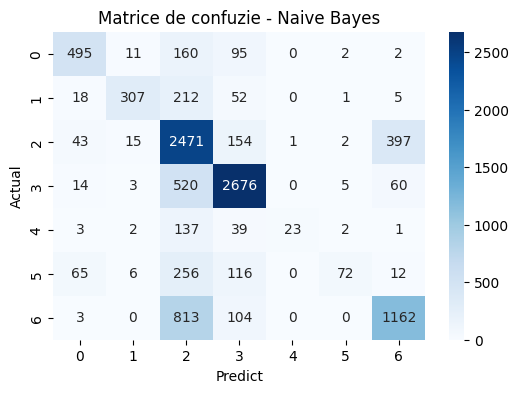


🔹 Logistic Regression Model Evaluation 🔹
Accuracy: 0.7684
Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.79      0.78      0.78       765
             Bipolar       0.88      0.73      0.80       595
          Depression       0.72      0.73      0.73      3083
              Normal       0.83      0.95      0.89      3278
Personality disorder       0.83      0.48      0.61       207
              Stress       0.67      0.44      0.53       527
            Suicidal       0.69      0.66      0.67      2082

            accuracy                           0.77     10537
           macro avg       0.77      0.68      0.72     10537
        weighted avg       0.76      0.77      0.76     10537



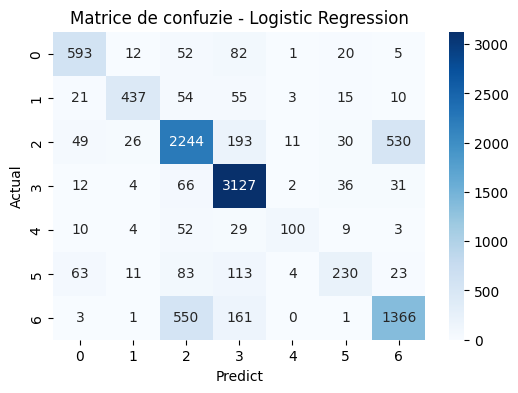


🔹 Random Forest Model Evaluation 🔹
Accuracy: 0.7233
Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.80      0.68      0.74       765
             Bipolar       0.96      0.54      0.69       595
          Depression       0.60      0.79      0.68      3083
              Normal       0.82      0.94      0.88      3278
Personality disorder       1.00      0.43      0.60       207
              Stress       0.92      0.26      0.41       527
            Suicidal       0.69      0.49      0.57      2082

            accuracy                           0.72     10537
           macro avg       0.83      0.59      0.65     10537
        weighted avg       0.74      0.72      0.71     10537



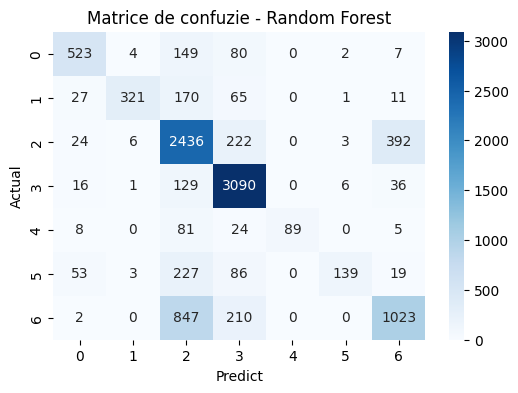

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inițializăm modelele
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Antrenăm modelele
nb_model.fit(X_train_tfidf, y_train)
lr_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)

# 3. Facem predicții
nb_pred = nb_model.predict(X_test_tfidf)
lr_pred = lr_model.predict(X_test_tfidf)
rf_pred = rf_model.predict(X_test_tfidf)

# 4. Evaluăm modelele
def evaluate_model(name, y_test, y_pred):
    print(f"\n🔹 {name} Model Evaluation 🔹")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Matrice de confuzie
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confuzie - {name}")
    plt.xlabel("Predict")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Naive Bayes", y_test, nb_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)


**Cel mai bun model pana acum este Logistic Regression** 

Doresc să obțin rezultate mai bune așa că voi încerca să mai înbunătățesc datele

**Aplic N-grams la date**

TF-IDF îți analizează fiecare cuvânt separat, dar în unele cazuri contextul contează mai mult.  
De exemplu:  
- "I feel very sad" → Cu TF-IDF, fiecare cuvânt e analizat separat: "I", "feel", "very", "sad"  

- Cu bigrame (n-gram=2): "I feel", "feel very", "very sad"  
- Cu trigrame (n-gram=3): "I feel very", "feel very sad"

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)  # Unigram + Bigram
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [94]:
print("Noua formă matrice TF-IDF pentru train:", X_train_tfidf.shape)
print("Noua formă matrice TF-IDF pentru test:", X_test_tfidf.shape)


Noua formă matrice TF-IDF pentru train: (42144, 5000)
Noua formă matrice TF-IDF pentru test: (10537, 5000)


In [95]:
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Primele 20 de features:", feature_names[:20])


Primele 20 de features: ['abandoned' 'abdomen' 'abilify' 'ability' 'able' 'able find' 'able get'
 'able go' 'able help' 'able make' 'abroad' 'absolute' 'absolutely'
 'absolutely nothing' 'abt' 'abuse' 'abused' 'abusing' 'abusive'
 'academic']


In [96]:
bigrams = [word for word in feature_names if " " in word]
print(f"Număr de bigrame: {len(bigrams)} din {len(feature_names)}")
print("Primele 10 bigrame:", bigrams[:10])


Număr de bigrame: 1770 din 5000
Primele 10 bigrame: ['able find', 'able get', 'able go', 'able help', 'able make', 'absolutely nothing', 'act like', 'acting like', 'actually want', 'advice would']


Facem Lemmatizare in loc de Stemming

In [97]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download the wordnet resource
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['clean_statement'] = df['clean_statement'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['clean_statement'].head(10)  # Verificăm primele 10 rânduri după lemmatizare

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                              im lazy complain ba ihh
1    think wifi iphone broken quot connect quot act...
2    good tracking apps ive trying find apps track ...
3    recently looked reddit found place actually qu...
4                                 thats favorite thing
5    enough goody play santa claus reindeer came wa...
6      want sleep soon call prayer midday heavy sleepy
7                        use wipe handle shopping cart
8    good focus goal mean example goal find good jo...
9    hi guy looking podcasts listen tall depression...
Name: clean_statement, dtype: object

### Optimizarea hiperparametrilor

GridSearchCV (căutare exhaustivă) dureaza prea mult pentru random forest.

Incercam RandomizedSearchCV (căutare aleatorie)

Aici am incercat pentru Random Forest

In [98]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
	'n_estimators': [50, 100, 200],
	'max_depth': [10, 20, 30, None],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_tfidf, y_train)  # Use TF-IDF-transformed data

print(random_search.best_params_)




{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [99]:
print(random_search.best_score_)

0.7196754312227944


Pentru Logistic Regresion am folosit GrindSeachCV

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # L1 funcționează doar cu anumite solvers
    'solver': ['lbfgs', 'liblinear']
}

log_search = GridSearchCV(LogisticRegression(max_iter=1000), log_param_grid, cv=5, scoring='accuracy')
log_search.fit(X_train_tfidf, y_train)

print("Best Logistic Regression params:", log_search.best_params_)
print("Best Logistic Regression score:", log_search.best_score_)


Best Logistic Regression params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression score: 0.7593252451885576


Pentru Navie Bayes am folosit GrindSearch

In [56]:
from sklearn.naive_bayes import MultinomialNB

nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

nb_search = GridSearchCV(MultinomialNB(), nb_param_grid, cv=5, scoring='accuracy')
nb_search.fit(X_train_tfidf, y_train)

print("Best Naive Bayes params:", nb_search.best_params_)
print("Best Naive Bayes score:", nb_search.best_score_)

Best Naive Bayes params: {'alpha': 0.1}
Best Naive Bayes score: 0.6997438555829951


Evaluam din nou modelele 

In [57]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
best_lr = LogisticRegression(C=1, penalty='l2', solver='lbfgs', max_iter=1000)
best_lr.fit(X_train_tfidf, y_train)
y_pred_lr = best_lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
best_rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, max_depth=30)
best_rf.fit(X_train_tfidf, y_train)
y_pred_rf = best_rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Naive Bayes
best_nb = MultinomialNB(alpha=0.1)
best_nb.fit(X_train_tfidf, y_train)
y_pred_nb = best_nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.7659675429439119
                      precision    recall  f1-score   support

             Anxiety       0.80      0.78      0.79       765
             Bipolar       0.87      0.73      0.79       595
          Depression       0.72      0.73      0.72      3083
              Normal       0.83      0.95      0.89      3278
Personality disorder       0.84      0.49      0.62       207
              Stress       0.65      0.42      0.51       527
            Suicidal       0.68      0.65      0.67      2082

            accuracy                           0.77     10537
           macro avg       0.77      0.68      0.71     10537
        weighted avg       0.76      0.77      0.76     10537

Random Forest Accuracy: 0.6700199297712821
                      precision    recall  f1-score   support

             Anxiety       0.84      0.42      0.56       765
             Bipolar       0.95      0.45      0.61       595
          Depression       0.58     

#### În final cel mai bun model este Logistic Regression

In [58]:
import joblib
joblib.dump(best_lr, 'final_logistic_model.pkl')


['final_logistic_model.pkl']

### Testam modelul pe date noi

In [59]:
# Exemplu de propoziții (câte una pentru fiecare clasă)
test_sentences = [
    "I feel sad and have no motivation to do anything.",               # Depression
    "I'm scared and my heart is racing for no reason.",               # Anxiety
    "I want to hurt myself, I feel hopeless.",                        # Suicidal
    "Everything is fine. Just another regular day.",                  # Normal
    "I can't focus, my emotions keep shifting constantly.",           # Bipolar
    "I feel extremely pressured by deadlines and responsibilities.",  # Stress
    "I feel like my identity is unstable, who even am I?",            # Personality disorder
]

# Curățare text (presupunem că ai deja funcția clean_text)
cleaned_sentences = [clean_text(text) for text in test_sentences]

# TF-IDF transform
tfidf_test = tfidf_vectorizer.transform(cleaned_sentences)

# Predict cu Logistic Regression (sau modelul tău preferat)
predictions = best_lr.predict(tfidf_test)

# Decodăm și afișăm rezultatele
for original, pred in zip(test_sentences, predictions):
    print(f"\nText: {original}\n Predicție: {pred}")




Text: I feel sad and have no motivation to do anything.
 Predicție: Depression

Text: I'm scared and my heart is racing for no reason.
 Predicție: Anxiety

Text: I want to hurt myself, I feel hopeless.
 Predicție: Depression

Text: Everything is fine. Just another regular day.
 Predicție: Normal

Text: I can't focus, my emotions keep shifting constantly.
 Predicție: Normal

Text: I feel extremely pressured by deadlines and responsibilities.
 Predicție: Normal

Text: I feel like my identity is unstable, who even am I?
 Predicție: Normal


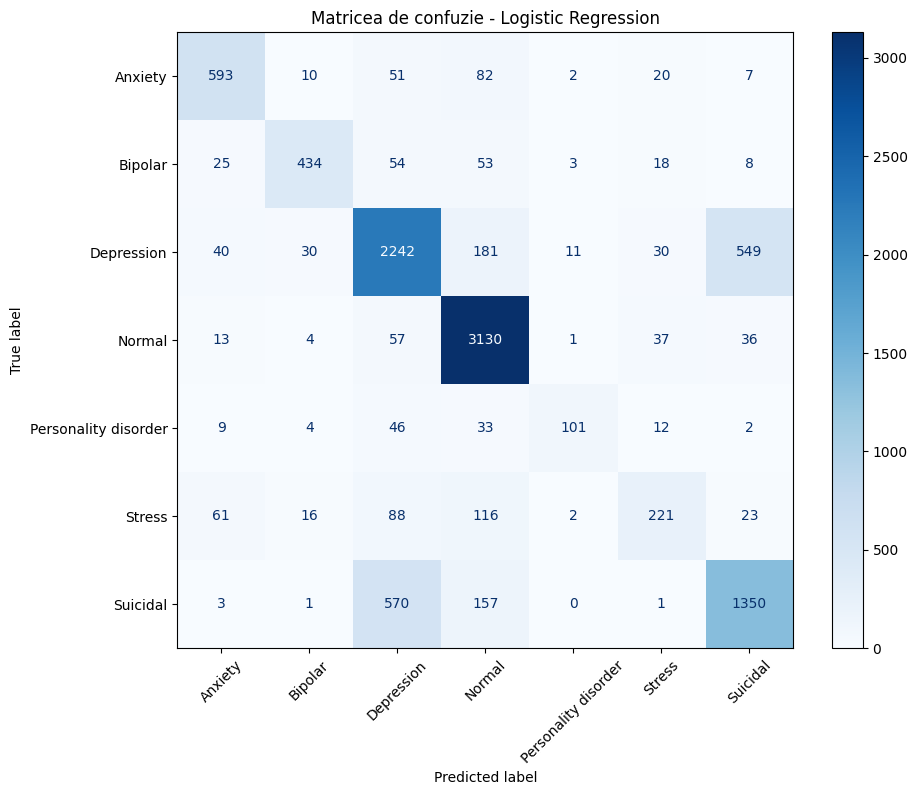

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obținem predicțiile modelului logistic (sau alt model preferat)
y_pred = best_lr.predict(X_test_tfidf)

# Construim matricea de confuzie
cm = confusion_matrix(y_test, y_pred)
labels = encoder.classes_  # pentru denumiri clare pe axă

# Afișăm matricea
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Matricea de confuzie - Logistic Regression")
plt.grid(False)
plt.show()


**Clasele sunt foarte dezechilibrate și am să încerc sa le echilibrez manual**

In [61]:
# Ponderi definite pe clase (numele originale)
manual_weights = {
    'Normal': 0.3,
    'Depression': 1.0,
    'Anxiety': 1.2,
    'Suicidal': 2.5,
    'Stress': 1.5,
    'Bipolar': 3.5,
    'Personality disorder': 4.0
}

# Antrenare model Logistic Regression cu ponderi corecte
model_weighted = LogisticRegression(max_iter=1000, class_weight=manual_weights)
model_weighted.fit(X_train_tfidf, y_train)
# Predictii și evaluare
y_pred_weighted = model_weighted.predict(X_test_tfidf)

from sklearn.metrics import classification_report, accuracy_score
print("Logistic Regression cu class weights")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted, target_names=encoder.classes_))


Logistic Regression cu class weights
Accuracy: 0.741672202714245
                      precision    recall  f1-score   support

             Anxiety       0.80      0.78      0.79       765
             Bipolar       0.75      0.84      0.79       595
          Depression       0.77      0.58      0.66      3083
              Normal       0.94      0.84      0.89      3278
Personality disorder       0.63      0.73      0.68       207
              Stress       0.58      0.52      0.55       527
            Suicidal       0.55      0.84      0.67      2082

            accuracy                           0.74     10537
           macro avg       0.72      0.73      0.72     10537
        weighted avg       0.77      0.74      0.74     10537



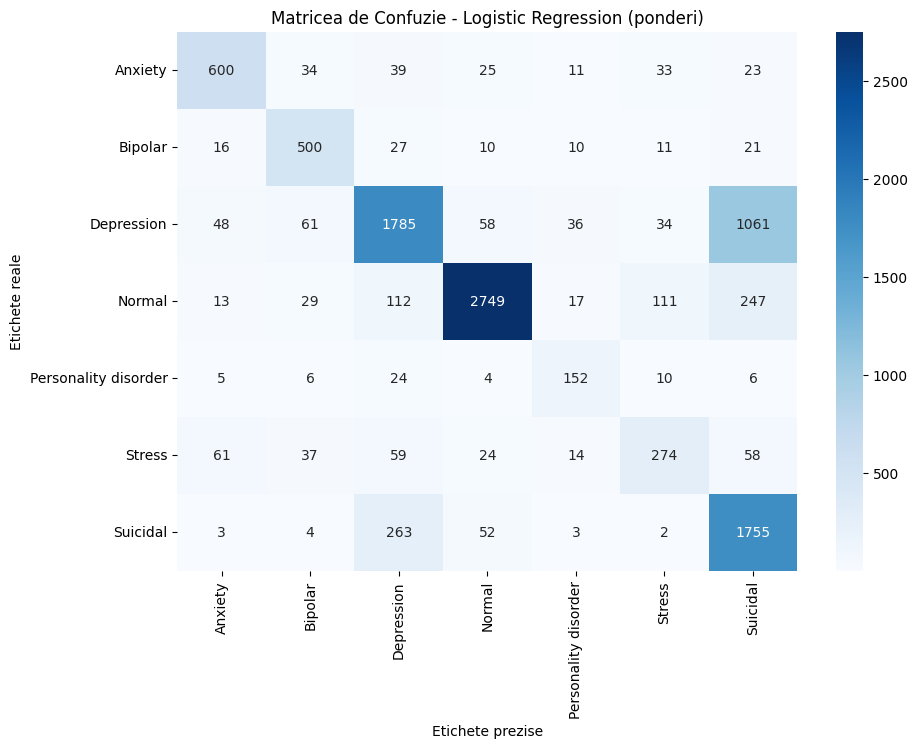

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creează matricea de confuzie
cm = confusion_matrix(y_test, y_pred_weighted)

# Setează dimensiunea și fonturile
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.classes_, 
            yticklabels=encoder.classes_)

plt.xlabel('Etichete prezise')
plt.ylabel('Etichete reale')
plt.title('Matricea de Confuzie - Logistic Regression (ponderi)')
plt.show()


Retestăm modelul

In [63]:
# Exemplu de propoziții (câte una pentru fiecare clasă)
test_sentences = [
    # Depression
    "Lately, I can't get out of bed and everything feels meaningless.",
    "I don’t enjoy anything anymore, even the things I used to love.",

    # Anxiety
    "My chest feels tight, and I can’t stop worrying about the future.",
    "I constantly overthink everything, even small decisions.",

    # Suicidal
    "Sometimes I wonder if people would be better off without me.",
    "I’ve been thinking about ending it all. I feel like a burden.",

    # Normal
    "I went out with friends today and it felt really nice.",
    "Just wrapped up work, planning to watch a movie tonight.",

    # Bipolar
    "Yesterday I felt invincible, now I can't stop crying.",
    "My mood changes so fast, I feel like I’m not in control.",

    # Stress
    "Deadlines are piling up and I barely sleep anymore.",
    "I feel like I’m drowning in responsibilities and expectations.",

    # Personality disorder
    "Sometimes I feel like I don’t know who I really am.",
    "My relationships are intense and unstable — I either adore or hate people."
]


# Curățare text (presupunem că ai deja funcția clean_text)
cleaned_sentences = [clean_text(text) for text in test_sentences]

# TF-IDF transform
tfidf_test = tfidf_vectorizer.transform(cleaned_sentences)

# Predict cu Logistic Regression (sau modelul tău preferat)
predictions = model_weighted.predict(tfidf_test)

# Decodăm și afișăm rezultatele
for original, pred in zip(test_sentences, predictions):
    print(f"\nText: {original}\n Predicție: {pred}")


Text: Lately, I can't get out of bed and everything feels meaningless.
 Predicție: Normal

Text: I don’t enjoy anything anymore, even the things I used to love.
 Predicție: Depression

Text: My chest feels tight, and I can’t stop worrying about the future.
 Predicție: Anxiety

Text: I constantly overthink everything, even small decisions.
 Predicție: Depression

Text: Sometimes I wonder if people would be better off without me.
 Predicție: Suicidal

Text: I’ve been thinking about ending it all. I feel like a burden.
 Predicție: Suicidal

Text: I went out with friends today and it felt really nice.
 Predicție: Normal

Text: Just wrapped up work, planning to watch a movie tonight.
 Predicție: Normal

Text: Yesterday I felt invincible, now I can't stop crying.
 Predicție: Normal

Text: My mood changes so fast, I feel like I’m not in control.
 Predicție: Bipolar

Text: Deadlines are piling up and I barely sleep anymore.
 Predicție: Depression

Text: I feel like I’m drowning in responsibil

Facem  Oversampling cu RandomOverSampler pentru a putea înbunătați clasele cu date puține

Raport de clasificare:

                      precision    recall  f1-score   support

             Anxiety       0.77      0.85      0.81       765
             Bipolar       0.81      0.83      0.82       595
          Depression       0.78      0.63      0.70      3083
              Normal       0.89      0.91      0.90      3278
Personality disorder       0.57      0.79      0.67       207
              Stress       0.53      0.66      0.59       527
            Suicidal       0.66      0.72      0.69      2082

            accuracy                           0.77     10537
           macro avg       0.71      0.77      0.74     10537
        weighted avg       0.77      0.77      0.77     10537



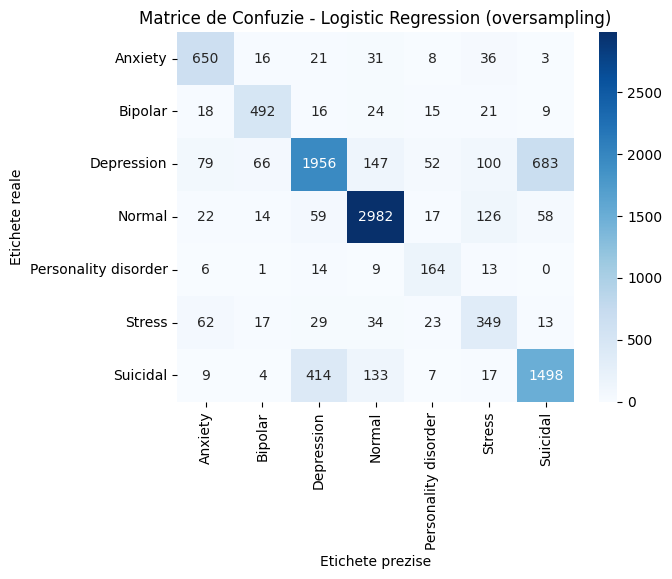

In [64]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Vectorizarea textelor
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 2. Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

# 3. Antrenare Logistic Regression pe datele balansate
model_balanced = LogisticRegression(max_iter=1000)
model_balanced.fit(X_resampled, y_resampled)

# 4. Testare
y_pred_balanced = model_balanced.predict(X_test_tfidf)
print("Raport de clasificare:\n")
print(classification_report(y_test, y_pred_balanced))

# 5. Matrice de confuzie
cm = confusion_matrix(y_test, y_pred_balanced, labels=model_balanced.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model_balanced.classes_, yticklabels=model_balanced.classes_, cmap='Blues')
plt.xlabel('Etichete prezise')
plt.ylabel('Etichete reale')
plt.title('Matrice de Confuzie - Logistic Regression (oversampling)')
plt.show()


In [65]:
# Exemplu de propoziții (câte una pentru fiecare clasă)
test_sentences = [
    # Depression
    "Lately, I can't get out of bed and everything feels meaningless.",
    "I don’t enjoy anything anymore, even the things I used to love.",

    # Anxiety
    "My chest feels tight, and I can’t stop worrying about the future.",
    "I constantly overthink everything, even small decisions.",

    # Suicidal
    "Sometimes I wonder if people would be better off without me.",
    "I’ve been thinking about ending it all. I feel like a burden.",

    # Normal
    "I went out with friends today and it felt really nice.",
    "Just wrapped up work, planning to watch a movie tonight.",

    # Bipolar
    "Yesterday I felt invincible, now I can't stop crying.",
    "My mood changes so fast, I feel like I’m not in control.",

    # Stress
    "Deadlines are piling up and I barely sleep anymore.",
    "I feel like I’m drowning in responsibilities and expectations.",

    # Personality disorder
    "Sometimes I feel like I don’t know who I really am.",
    "My relationships are intense and unstable — I either adore or hate people."
]


# Curățare text (presupunem că ai deja funcția clean_text)
cleaned_sentences = [clean_text(text) for text in test_sentences]

# TF-IDF transform using the same vectorizer used for training
tfidf_test = vectorizer.transform(cleaned_sentences)

# Predict cu Logistic Regression (sau modelul tău preferat)
predictions = model_balanced.predict(tfidf_test)

# Decodăm și afișăm rezultatele
for original, pred in zip(test_sentences, predictions):
    print(f"\nText: {original}\n Predicție: {pred}")


Text: Lately, I can't get out of bed and everything feels meaningless.
 Predicție: Depression

Text: I don’t enjoy anything anymore, even the things I used to love.
 Predicție: Depression

Text: My chest feels tight, and I can’t stop worrying about the future.
 Predicție: Anxiety

Text: I constantly overthink everything, even small decisions.
 Predicție: Depression

Text: Sometimes I wonder if people would be better off without me.
 Predicție: Personality disorder

Text: I’ve been thinking about ending it all. I feel like a burden.
 Predicție: Anxiety

Text: I went out with friends today and it felt really nice.
 Predicție: Normal

Text: Just wrapped up work, planning to watch a movie tonight.
 Predicție: Normal

Text: Yesterday I felt invincible, now I can't stop crying.
 Predicție: Normal

Text: My mood changes so fast, I feel like I’m not in control.
 Predicție: Bipolar

Text: Deadlines are piling up and I barely sleep anymore.
 Predicție: Normal

Text: I feel like I’m drowning in 

Combinăm cele 2 metode

Raport de clasificare:

                      precision    recall  f1-score   support

             Anxiety       0.75      0.84      0.79       765
             Bipolar       0.69      0.86      0.76       595
          Depression       0.81      0.49      0.61      3083
              Normal       0.96      0.76      0.85      3278
Personality disorder       0.45      0.82      0.58       207
              Stress       0.44      0.68      0.54       527
            Suicidal       0.55      0.86      0.67      2082

            accuracy                           0.71     10537
           macro avg       0.66      0.76      0.69     10537
        weighted avg       0.77      0.71      0.71     10537



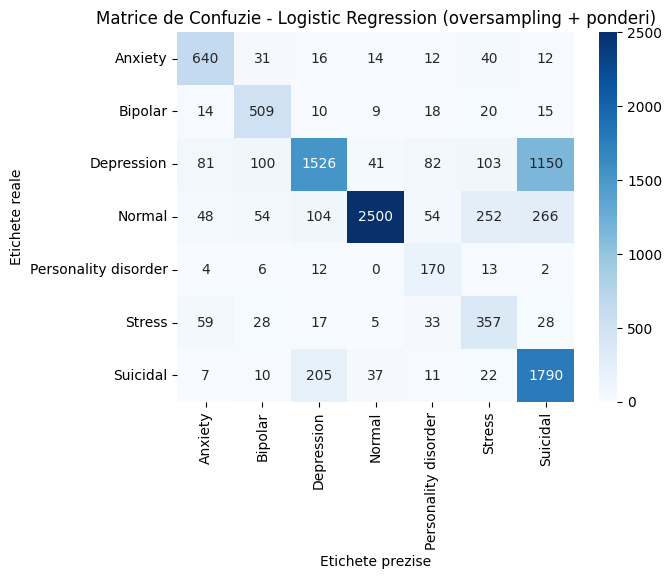

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Vectorizarea textelor
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 2. Oversampling pe setul de antrenare
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

# 3. Definirea ponderilor manuale
manual_weights = {
    'Normal': 0.3,
    'Depression': 1.0,
    'Anxiety': 1.2,
    'Suicidal': 2.5,
    'Stress': 1.5,
    'Bipolar': 3.5,
    'Personality disorder': 4.0
}

# 4. Antrenare Logistic Regression cu oversampling + ponderi
model = LogisticRegression(max_iter=1000, class_weight=manual_weights)
model.fit(X_resampled, y_resampled)

# 5. Testare
y_pred = model.predict(X_test_tfidf)
print("Raport de clasificare:\n")
print(classification_report(y_test, y_pred))

# 6. Matrice de confuzie
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel('Etichete prezise')
plt.ylabel('Etichete reale')
plt.title('Matrice de Confuzie - Logistic Regression (oversampling + ponderi)')
plt.show()


Observăm că acurateția modelulei a scăzut dar clasele sunt mai echilibrate 

In [67]:
# Exemplu de propoziții (câte una pentru fiecare clasă)
test_sentences = [
    # Depression
    "Lately, I can't get out of bed and everything feels meaningless.",
    "I don’t enjoy anything anymore, even the things I used to love.",

    # Anxiety
    "My chest feels tight, and I can’t stop worrying about the future.",
    "I constantly overthink everything, even small decisions.",

    # Suicidal
    "Sometimes I wonder if people would be better off without me.",
    "I’ve been thinking about ending it all. I feel like a burden.",

    # Normal
    "I went out with friends today and it felt really nice.",
    "Just wrapped up work, planning to watch a movie tonight.",

    # Bipolar
    "Yesterday I felt invincible, now I can't stop crying.",
    "My mood changes so fast, I feel like I’m not in control.",

    # Stress
    "Deadlines are piling up and I barely sleep anymore.",
    "I feel like I’m drowning in responsibilities and expectations.",

    # Personality disorder
    "Sometimes I feel like I don’t know who I really am.",
    "My relationships are intense and unstable — I either adore or hate people."
]


# Curățare text (presupunem că ai deja funcția clean_text)
cleaned_sentences = [clean_text(text) for text in test_sentences]

# TF-IDF transform using the same vectorizer used for training
tfidf_test = vectorizer.transform(cleaned_sentences)

# Predict cu Logistic Regression (sau modelul tău preferat)
predictions = model.predict(tfidf_test)

# Decodăm și afișăm rezultatele
for original, pred in zip(test_sentences, predictions):
    print(f"\nText: {original}\n Predicție: {pred}")


Text: Lately, I can't get out of bed and everything feels meaningless.
 Predicție: Depression

Text: I don’t enjoy anything anymore, even the things I used to love.
 Predicție: Depression

Text: My chest feels tight, and I can’t stop worrying about the future.
 Predicție: Anxiety

Text: I constantly overthink everything, even small decisions.
 Predicție: Depression

Text: Sometimes I wonder if people would be better off without me.
 Predicție: Personality disorder

Text: I’ve been thinking about ending it all. I feel like a burden.
 Predicție: Anxiety

Text: I went out with friends today and it felt really nice.
 Predicție: Normal

Text: Just wrapped up work, planning to watch a movie tonight.
 Predicție: Normal

Text: Yesterday I felt invincible, now I can't stop crying.
 Predicție: Stress

Text: My mood changes so fast, I feel like I’m not in control.
 Predicție: Bipolar

Text: Deadlines are piling up and I barely sleep anymore.
 Predicție: Depression

Text: I feel like I’m drowning